In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

C:\Users\lenovo\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [7]:
qSimon = QuantumCircuit(4, 2)
qSimon.h(0)
qSimon.h(1)
qSimon.barrier()
qSimon.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     └───┘ ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
           ░ 
c: 2/════════

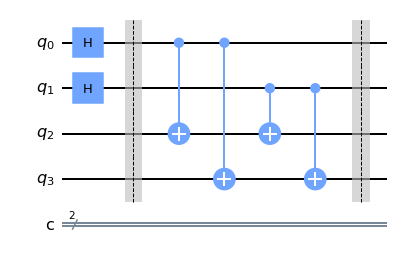

In [8]:
qSimon.cx(0,2)
qSimon.cx(0,3)
qSimon.cx(1,2)
qSimon.cx(1,3)
qSimon.barrier()
qSimon.draw('mpl')

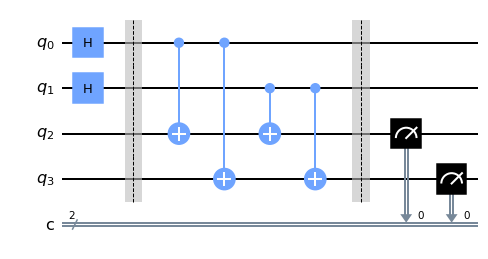

In [9]:
qSimon.measure(2,0)
qSimon.measure(3,0)
qSimon.draw('mpl')

## Running it on a local quantum simulator


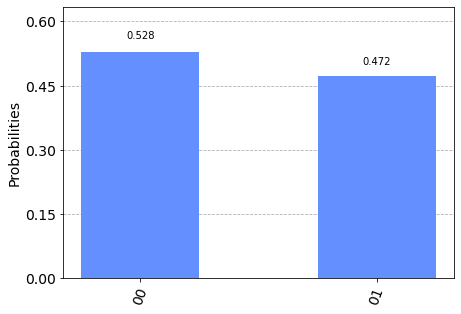

In [10]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qSimon, backend = backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

## Running it on a IBM Q quantum computer


In [11]:
from qiskit.tools.monitor import job_monitor
qProvider = IBMQ.get_provider();
qComp = qProvider.get_backend('ibmq_santiago')
job = execute(qSimon, backend = qComp, shots = 1024)
job_monitor(job)

Job Status: job has successfully run


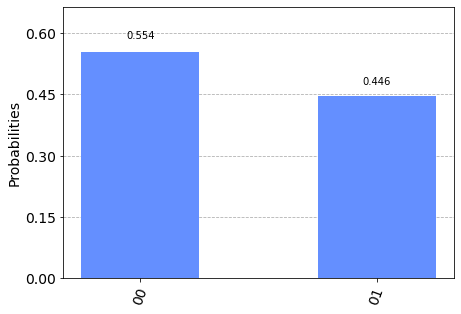

In [12]:
counts = job.result().get_counts()
plot_histogram(counts)